# Neuroimaging Connectomics 03: fMRI Activity & Connectivity


***Dr. Erin W. Dickie***

*KCNI Summer School 2021*

---

In [1]:
%%bash

## download and install wb_command
wget https://www.humanconnectome.org/storage/app/media/workbench/workbench-linux64-v1.5.0.zip
unzip workbench-linux64-v1.5.0.zip
export PATH=${PATH}:${PWD}/workbench/bin_linux64/
ln -s /content/workbench/bin_linux64/wb_command /usr/local/bin/wb_command

## installing nilearn (and nibabel)
pip install nilearn

Archive:  workbench-linux64-v1.5.0.zip


--2021-07-09 01:55:06--  https://www.humanconnectome.org/storage/app/media/workbench/workbench-linux64-v1.5.0.zip
Resolving www.humanconnectome.org (www.humanconnectome.org)... 216.70.114.87
Connecting to www.humanconnectome.org (www.humanconnectome.org)|216.70.114.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111556371 (106M) [application/zip]
Saving to: ‘workbench-linux64-v1.5.0.zip.2’

     0K .......... .......... .......... .......... ..........  0% 1.95M 55s
    50K .......... .......... .......... .......... ..........  0% 3.71M 42s
   100K .......... .......... .......... .......... ..........  0% 3.60M 38s
   150K .......... .......... .......... .......... ..........  0% 3.85M 35s
   200K .......... .......... .......... .......... ..........  0% 57.2M 28s
   250K .......... .......... .......... .......... ..........  0% 47.0M 24s
   300K .......... .......... .......... .......... ..........  0% 3.89M 25s
   350K .......... .......... ........

In [2]:
%%bash

## add folders for data
mkdir -p data/sub-MSC01/func
mkdir -p data/sub-MSC01/anat
mkdir -p data/atlases

## pull the fMRI data
wget -O data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_bold_32k_fsLR.dtseries.nii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:processed_restingstate_timecourses:ses-func01:cifti:sub-MSC01_ses-func01_task-rest_bold_32k_fsLR.dtseries.nii

## pull the surfaces for plotting
wget -O data/sub-MSC01/anat/MSC01.L.very_inflated.32k_fs_LR.surf.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.L.very_inflated.32k_fs_LR.surf.gii
wget -O data/sub-MSC01/anat/MSC01.L.midthickness.32k_fs_LR.surf.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.L.midthickness.32k_fs_LR.surf.gii

## pull the aparc labels
wget -O data/sub-MSC01/anat/MSC01.R.aparc.32k_fs_LR.label.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.R.aparc.32k_fs_LR.label.gii
wget -O data/sub-MSC01/anat/MSC01.L.aparc.32k_fs_LR.label.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.L.aparc.32k_fs_LR.label.gii

## pull Schaefer parcellations at 400 and 1000 parcel resolution
wget -O data/atlases/Schaefer2018_400Parcels_17Networks_order.dlabel.nii https://raw.githubusercontent.com/ThomasYeoLab/CBIG/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/HCP/fslr32k/cifti/Schaefer2018_400Parcels_17Networks_order.dlabel.nii
wget -O data/atlases/Schaefer2018_1000Parcels_17Networks_order.dlabel.nii https://raw.githubusercontent.com/ThomasYeoLab/CBIG/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/HCP/fslr32k/cifti/Schaefer2018_1000Parcels_17Networks_order.dlabel.nii

--2021-07-09 01:55:12--  https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:processed_restingstate_timecourses:ses-func01:cifti:sub-MSC01_ses-func01_task-rest_bold_32k_fsLR.dtseries.nii
Resolving openneuro.org (openneuro.org)... 13.32.86.34, 13.32.86.36, 13.32.86.73, ...
Connecting to openneuro.org (openneuro.org)|13.32.86.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_bold_32k_fsLR.dtseries.nii’

     0K .......... .......... .......... .......... .......... 2.39M
    50K .......... .......... .......... .......... .......... 2.91M
   100K .......... .......... .......... .......... .......... 6.00M
   150K .......... .......... .......... .......... .......... 7.14M
   200K .......... .......... .......... .......... .......... 3.04M
   250K .......... .......... .......... .......... .......... 9.59M

In [3]:
## checking that wb_command is installed
! wb_command

Version: 1.5.0
Commit Date: 2021-02-16 13:46:47 -0600
Operating System: Linux

Information options:
   -help                       show this help info
   -arguments-help             explain the format of subcommand help info
   -global-options             display options that can be added to any command
   -parallel-help              details on how wb_command uses parallelization
   -cifti-help                 explain the cifti file format and related terms
   -gifti-help                 explain the gifti file format (metric, surface)
   -volume-help                explain volume files, including label volumes
   -version                    show extended version information
   -list-commands              list all processing subcommands
   -list-deprecated-commands   list deprecated subcommands
   -all-commands-help          show all processing subcommands and their help
                                  info - VERY LONG

To get the help information of a processing subcommand, run it wi

The MidNigth Scan Club data makes preprocessed data available for download in a CIFTI file - ending in `dtseries.nii`. CIFTI files contain data mapped to the left and right cortical surfaces as well as to voxels from subcortical areas. 

In [4]:
from pathlib import Path
import pandas as pd
import nibabel as nib
import seaborn as sns
import numpy as np

from nilearn.plotting import plot_surf, plot_surf_contours
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


### Parcellating one participants data using wb_command

The MidNight Scan Club dataset made participant specific freesurfer (aparc) parcellations. at `label.gii` files.

We will use connectome workbench `wb_command` to combine both left and right labels into do dense label CIFTI file. 

We can use the `wb_command -cifti-parcellate` function to create a parcellated CIFTI file. In this parcellated CIFTI file, the functional timeseries and averaged within each "parcel" or "region-of-interest" within a given atlas file.

In [5]:
%%bash

# to help cifti-parcellate work we need to combine the left and right labels into one file
wb_command -cifti-create-label \
  data/sub-MSC01/anat/MSC01.aparc.32k_fs_LR.dlabel.nii \
  -left-label data/sub-MSC01/anat/MSC01.L.aparc.32k_fs_LR.label.gii \
  -right-label data/sub-MSC01/anat/MSC01.R.aparc.32k_fs_LR.label.gii

# using workbench to parcellate the file
wb_command -cifti-parcellate \
  data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_bold_32k_fsLR.dtseries.nii \
  data/sub-MSC01/anat/MSC01.aparc.32k_fs_LR.dlabel.nii \
  COLUMN \
  data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-aparc_bold.ptseries.nii -legacy-mode

### Loading a parcellated file with nibabel

The output of the above step was a new "parcellated timeseries" or `ptseries.nii` file. This file is special because it holds the data (averaged across brain regions) BUT ALSO, information about the location and names of those brain regions.

Let's load the `ptseries.nii` file using nibabel (abbreviated `nib`) to explore. 

In [6]:
## load the file as a nibabel image object
aparc_ptseries_nib = nib.load('data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-aparc_bold.ptseries.nii')
left_surface_mesh = 'data/sub-MSC01/anat/MSC01.L.very_inflated.32k_fs_LR.surf.gii' ## we will use this later for plotting

## now that it has been loaded we can get the data from within it using the get_fdata() method
aparc_ptseries_data = aparc_ptseries_nib.get_fdata()
aparc_ptseries_data.shape

(818, 34)

The data was returned as a numpy data array of size (n timepoints, n parcels).

+ How many timepoints are in this dataset?
+ How many brain regions?

### Getting the name of the parcels

The parcel names are stored in the header metadata for axis 1 (axis 1 is parcels in this case)

In [7]:
aparc_parcels = aparc_ptseries_nib.header.get_axis(1).name
aparc_parcels # print the parcel names

array(['caudalmiddlefrontal', 'entorhinal', 'postcentral',
       'parstriangularis', 'supramarginal', 'insula', 'bankssts',
       'lateralorbitofrontal', 'parsorbitalis', 'middletemporal',
       'pericalcarine', 'parahippocampal', 'paracentral',
       'medialorbitofrontal', 'frontalpole', 'cuneus', 'inferiortemporal',
       'rostralmiddlefrontal', 'rostralanteriorcingulate',
       'isthmuscingulate', 'lateraloccipital', 'lingual',
       'superiorparietal', 'parsopercularis', 'fusiform',
       'caudalanteriorcingulate', 'superiorfrontal', 'temporalpole',
       'precuneus', 'transversetemporal', 'precentral',
       'inferiorparietal', 'posteriorcingulate', 'superiortemporal'],
      dtype='<U24')

### constucting a pandas data frame of the data

We can combine the timecourses from parcels and parcel names into one pandas dataframe

In [8]:
aparc_ptseries_df = pd.DataFrame(aparc_ptseries_data, columns=aparc_parcels)
aparc_ptseries_df.head()

,caudalmiddlefrontal,entorhinal,postcentral,parstriangularis,supramarginal,insula,bankssts,lateralorbitofrontal,parsorbitalis,middletemporal,pericalcarine,parahippocampal,paracentral,medialorbitofrontal,frontalpole,cuneus,inferiortemporal,rostralmiddlefrontal,rostralanteriorcingulate,isthmuscingulate,lateraloccipital,lingual,superiorparietal,parsopercularis,fusiform,caudalanteriorcingulate,superiorfrontal,temporalpole,precuneus,transversetemporal,precentral,inferiorparietal,posteriorcingulate,superiortemporal
0,0.634367,0.369831,-0.077062,0.657812,-0.071684,1.007607,-0.629209,0.040845,1.088546,-0.428308,1.511940,-0.208489,0.586680,-1.527467,0.680601,-0.919950,0.182761,0.124489,-1.265826,0.576501,-0.628103,-0.309075,-0.466675,0.163317,-0.168145,-0.432595,0.563276,0.604911,0.828475,1.240422,0.563722,0.177669,-0.636692,-0.354998
1,0.320871,1.113254,-0.147743,0.895980,0.121723,1.613747,-0.894909,-0.158576,0.574399,-0.449239,2.141029,0.093859,0.610318,-1.968466,0.556763,-0.770972,-0.213012,-0.037464,-1.362115,1.231672,-0.826005,-0.556492,-0.626011,0.217793,-0.215288,0.164576,0.546175,0.921718,1.518441,2.112185,0.476723,0.278731,0.275289,-0.103007
2,-0.460529,2.258364,-0.406716,1.222760,0.429060,1.752460,-0.466282,-0.258589,-0.527094,-0.194338,1.969511,0.351501,-0.141545,0.091948,0.475019,0.128331,-0.501159,-0.307584,-0.789285,1.072028,-0.521890,-0.631274,-0.639651,0.474416,-0.147286,0.594295,0.177423,1.139472,1.514055,2.117168,-0.247619,0.272141,1.111386,0.496430
3,-0.969031,2.750046,-0.781814,1.335634,0.449482,1.284122,-0.203498,0.139411,-0.832803,-0.007571,1.444046,0.883281,-1.008659,2.899197,0.725202,0.983025,-0.679789,-0.563256,0.211393,0.290491,0.007803,-0.456339,-0.501418,0.854077,0.131931,0.328176,-0.193329,0.976773,0.830743,0.904849,-1.027279,0.176131,0.702136,0.721039
4,-0.894487,1.844005,-0.773970,0.677468,0.270550,0.636241,-0.496972,0.484210,-0.132663,0.044021,0.796865,1.595014,-1.047152,3.055390,0.673857,1.185852,-0.877161,-0.592632,1.004469,-0.000068,-0.161510,0.113539,-0.243391,0.991358,0.423443,0.135785,-0.276236,0.458993,0.247962,-0.531193,-1.065760,0.168321,-0.109638,0.483938


### plot the timecourse from two parcels

Let's plot the timecourses from two parcels - remember that "fMRI connectomics" is really all about the correlation between these timecourses from difference brain regions.

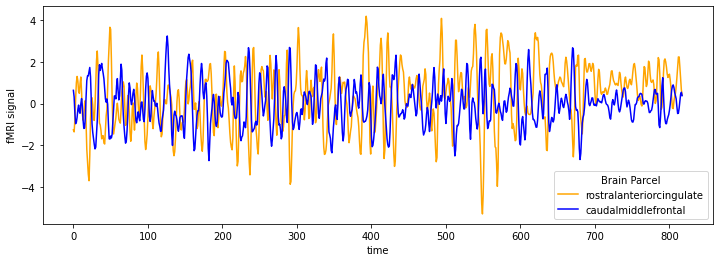

In [9]:

#plt.step(aparc_ptseries_df['rostralanteriorcingulate'], label='rostralanteriorcingulate')
plt.figure(figsize=(12,4))
plt.plot(aparc_ptseries_df['rostralanteriorcingulate'], color = "orange", label='rostralanteriorcingulate')
plt.plot(aparc_ptseries_df["caudalmiddlefrontal" ], color = "blue", label="caudalmiddlefrontal" )

plt.legend(title='Brain Parcel')
plt.xlabel('time')
plt.ylabel('fMRI signal')

plt.show()

### But where are these parcels? - reading location metadata

The location of parcels in stored in the CIFTI parcellated file header.  Let's use that info to create a mask of the left rostral anterior cingulate

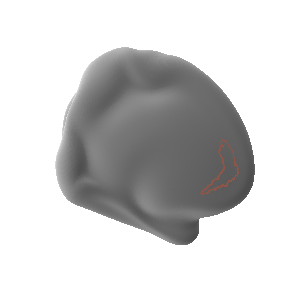

In [10]:

## get the number of vertices in the left surface from the parcal axis (axis 1)
## (note: 'CIFTI_STRUCTURE_CORTEX_LEFT' is a weird code of left surface)
parcel_axis = aparc_ptseries_nib.header.get_axis(1)
total_surface_vertices = parcel_axis.nvertices['CIFTI_STRUCTURE_CORTEX_LEFT']

roi_map = np.zeros(total_surface_vertices)
roi_idx = np.where(parcel_axis.name == "rostralanteriorcingulate")[0]
roi_verts = parcel_axis.vertices[int(roi_idx)]['CIFTI_STRUCTURE_CORTEX_LEFT']
roi_map[roi_verts] = 1

p3 = plot_surf_contours(surf_mesh=left_surface_mesh, 
                  roi_map = roi_map, 
                  view = "medial")

### Calculate the correlation matrix using pandas

In [11]:
aparc_cor_df = aparc_ptseries_df.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
aparc_corZ_df = np.arctanh(aparc_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
aparc_corZ_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in arctanh
  


,caudalmiddlefrontal,entorhinal,postcentral,parstriangularis,supramarginal,insula,bankssts,lateralorbitofrontal,parsorbitalis,middletemporal,pericalcarine,parahippocampal,paracentral,medialorbitofrontal,frontalpole,cuneus,inferiortemporal,rostralmiddlefrontal,rostralanteriorcingulate,isthmuscingulate,lateraloccipital,lingual,superiorparietal,parsopercularis,fusiform,caudalanteriorcingulate,superiorfrontal,temporalpole,precuneus,transversetemporal,precentral,inferiorparietal,posteriorcingulate,superiortemporal
caudalmiddlefrontal,inf,-0.245785,-0.145131,0.077384,0.030852,-0.445932,0.185979,-0.089082,0.491878,0.118589,-0.040305,-0.131105,-0.306459,-0.258089,-0.105166,-0.255307,0.542599,0.657726,-0.352390,-0.153422,-0.284098,-0.237010,0.413465,0.397877,0.047246,-0.281799,0.178433,-0.240268,0.119813,-0.242970,-0.098344,0.670110,-0.414981,-0.306077
entorhinal,-0.245785,inf,0.161565,0.133950,0.042492,0.611415,-0.117949,0.071924,0.053989,-0.106682,0.070591,0.357216,0.153529,0.101610,0.216778,0.018101,-0.027880,-0.182417,-0.154388,0.194853,-0.245493,-0.003138,-0.118149,0.187953,0.316752,0.200973,-0.058607,0.750150,0.104305,0.259351,0.179950,-0.175037,0.215800,0.159020
postcentral,-0.145131,0.161565,inf,-0.008681,0.485754,0.294360,0.209951,-0.218040,-0.067272,0.048200,-0.279037,-0.091418,0.023241,0.016464,0.159824,-0.050973,0.058844,-0.287585,-0.081629,-0.001637,-0.372796,-0.118240,-0.096923,0.095456,-0.039529,0.145125,0.164775,0.163720,-0.082110,0.476176,1.247402,-0.262908,0.096142,0.409414
parstriangularis,0.077384,0.133950,-0.008681,inf,0.273465,0.410700,0.180026,-0.147509,0.244646,0.054348,0.038316,0.014632,0.163409,-0.199380,-0.190734,0.133262,0.153073,0.047499,-0.262199,-0.422152,-0.012401,0.062265,0.029332,0.687705,0.210148,0.428601,0.136659,-0.062718,-0.423606,0.308515,0.107935,0.027574,-0.088963,0.045667
supramarginal,0.030852,0.042492,0.485754,0.273465,inf,0.419501,-0.026542,-0.228259,0.137460,-0.037629,-0.201257,-0.246417,0.126741,-0.204110,-0.117038,-0.112727,0.137004,0.248220,-0.401235,-0.418860,-0.147510,-0.111278,0.116464,0.666702,0.012179,0.335677,-0.001060,0.043404,-0.322200,0.287780,0.344996,-0.075395,0.187562,0.112059
insula,-0.445932,0.611415,0.294360,0.410700,0.419501,inf,-0.196105,-0.175218,-0.087206,-0.304437,0.181847,0.301088,0.430141,-0.196087,0.008733,0.256023,-0.190405,-0.241306,-0.270856,0.071975,-0.145652,0.239616,-0.099552,0.382069,0.240236,0.685875,-0.042790,0.331615,-0.071183,0.492592,0.322403,-0.451390,0.379948,0.280970
bankssts,0.185979,-0.117949,0.209951,0.180026,-0.026542,-0.196105,inf,-0.244398,-0.029742,0.603298,-0.461740,-0.084224,-0.295142,-0.063037,0.038418,-0.039948,0.270273,-0.145203,-0.060056,-0.148566,-0.287819,-0.211850,-0.056938,-0.002567,0.002227,-0.277993,0.046878,-0.101482,-0.064611,0.193506,0.177908,0.204388,-0.427091,0.686911
lateralorbitofrontal,-0.089082,0.071924,-0.218040,-0.147509,-0.228259,-0.175218,-0.244398,inf,0.052429,-0.284003,0.149825,-0.107093,0.151076,0.502377,0.212003,-0.222388,-0.127299,0.128969,0.201661,0.134135,0.128174,-0.109211,-0.056266,-0.127581,-0.224283,-0.077976,-0.057881,0.172247,0.045415,-0.197051,-0.292630,-0.172716,-0.034823,-0.240519
parsorbitalis,0.491878,0.053989,-0.067272,0.244646,0.137460,-0.087206,-0.029742,0.052429,inf,0.192057,-0.148752,-0.141979,-0.146251,-0.168044,-0.060722,-0.304647,0.439934,0.472504,-0.548895,-0.264011,-0.225762,-0.246172,0.081745,0.436280,0.066466,-0.191529,-0.020742,0.102469,-0.158359,-0.138782,-0.052265,0.315616,-0.155528,-0.152170
middletemporal,0.118589,-0.106682,0.048200,0.054348,-0.037629,-0.304437,0.603298,-0.284003,0.192057,inf,-0.619231,-0.101793,-0.494512,-0.050072,0.089335,-0.345165,0.205233,-0.193121,0.027156,-0.209508,-0.227137,-0.333041,-0.345469,-0.198015,-0.013111,-0.326400,0.199040,-0.025037,-0.041694,-0.114906,-0.020944,0.379764,-0.180759,0.478740


### visualize the correlation matrix using seabon's heatmap

`seaborn` (abbr. `sns`) is a great package for quickly plotting things. It's very similar to R`s `ggplot`

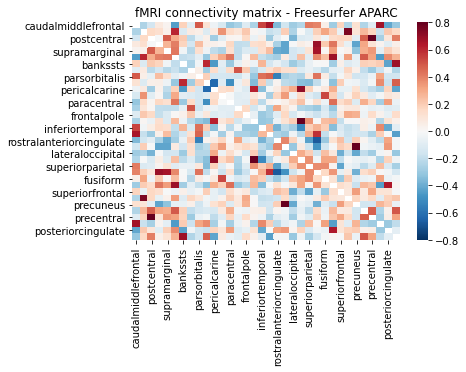

In [12]:
p2 = sns.heatmap(aparc_corZ_df, vmin=-.8, vmax=.8, cmap="RdBu_r").set_title("fMRI connectivity matrix - Freesurfer APARC")

## writing the data back to a CIFTI parcellated image

The CIFTI parcellated file format can be pretty great for saving our intermediate results. Because it means we can combine our results back with the parcel locations. So let's write a one column from our output correlations dataframe back to a parcellated scalars `*pscalar.nii` image.

(I've written a function to help with this, it essential takes the metadata from our input file and combines it with our dataframe)

In [13]:
from pathlib import Path
def write_df_column_to_pscalar_nib(df, pscalar_template, 
        to_filename = None, columns = None, labelname_column = None):
    ''' write a column from a pandas dataframe to pscalar file in nibabel 
    
    Parameters
    ----------
    df: pandas DataFrame
        Pandas dataframe containing data to write to file (with rows as parcels)
    
    pscalar_template: nibabel.Cifti2Image or filepath
        A pscalar.nii or pterseries.nii file or image to read the parcel axis from
    
    to_filename: str or path
        (optional) path (with extension .pscalar.nii) to write the output to

    columns: str or list
        (optional) list of columns to select for the pscalar image

    labelnames_column: str
        (optional) name of column that contains labelnames that should match the pscalar parcel names
        If this is given than data will be merged/aligned with the parcel axis before writing file.
    
    Returns
    -------
    pscalar_img: nibabel.Cifti2Image
        nibabel image of the pscalar output
    '''

    ## read the parcel axis from a template file
    if isinstance(pscalar_template, (str, Path)):
        pscalar_template = nib.load(pscalar_template)
    template_axis = pscalar_template.header.get_index_map(1)
    axis1_parcels = nib.cifti2.cifti2_axes.ParcelsAxis.from_index_mapping(template_axis)
    assert (isinstance(axis1_parcels, nib.cifti2.cifti2_axes.ParcelsAxis)), "Did not creat parcel axis"

    if labelname_column:
        axis_df = pd.DataFrame({'labelnames': axis1_parcels.name})
        df = df.merge(axis_df, 
            left_on = labelname_column, right_on = 'labelnames', how = 'right')
    
    ## grab columns if they exist
    if columns:
        df = df[columns]

    # grab the data column(s) and resphape them to the shape for pscalar 
    ## note that the dataobj shape should be (n_map, n_parcels)
    data_vals = df.transpose().values
    if len(data_vals.shape) == 1:
        data_vals = np.reshape(data_vals, (1,data_vals.shape[0]))
    
    ## assert that the number of parcels matches the length of the data array
    assert (axis1_parcels.size == len(df.index)), 'The number of parcels does not match the number of rows'

    ## create a scalar axis with names inlcuding the column names
    axis0_scalars = nib.cifti2.cifti2_axes.ScalarAxis(name = df.columns)
    
    ## combine all the bits together
    new_header = nib.Cifti2Header.from_axes((axis0_scalars, axis1_parcels))
    pscalar_img = nib.Cifti2Image(
        dataobj=data_vals, header = new_header)
    if to_filename:
        nib.cifti2.save(
            img = pscalar_img,filename=to_filename)

    return(pscalar_img)

### another helper to map ALL the parcellated data to there locations on a surface

This is another helper function from Erin that maps data from all the parcels back to there location on the surface.

i.e. 33 parcels of results ---> 32000 surface vertices of results

In [14]:
def surf_map_from_pscalar_image(pscalar_img, surface, map = 0, fill_value = np.nan):
    '''
    Read data from parcellated scalar or parcellated timeseries image into full surface map for plotting
    
    Parameters
    ----------
    pscalar_img: nibabel image, str or path
        nibabel image or filepath to image with extension .pscalar.nii
    
    surface: str
        Surface to load (either CIFTI_STRUCTURE_CORTEX_LEFT or CIFTI_STRUCTURE_CORTEX_RIGHT)
    
    map: str or integer
        Either the name of the scalar map or the column index (default: 0)

    fill_value: numeric value
        value to fill missing data non-parcel vertices on the surfuce (default: np.nan)
        
    Return
    ------
    surf_out: numpy data array (nvertices,)
        the parcellated scalar data mapped to the surface
    '''
    
    # the pscalar img is a filepath - load it
    if isinstance(pscalar_img, (str, Path)):
        pscalar_img = nib.load(pscalar_img)
    
    ## define map_number based on the "map" input arg
    if isinstance(map, str):
        map_number = np.where(grads_nib.header.get_axis(0).name==map)[0]
        if len(map_number) != 1:
            raise ValueError(f"the map name {map} was not present in the scalar axis names")
        map_number = int(map_number[0])
    else: 
        map_number = int(map)

    # grab the data
    data = pscalar_img.get_fdata()[map_number,:]

    # grab the parcel axis (axis 1)
    axis = pscalar_img.header.get_axis(1)
    assert isinstance(axis, nib.cifti2.ParcelsAxis)

    # intialize an output array
    surf_out = np.zeros(axis.nvertices[surface])
    surf_out[:] = fill_value

    # iterate over the parcels writing the parcel values to the vertex indices
    for (parcel_data, parcel_vertices) in zip(data, axis.vertices):
        if surface in parcel_vertices:
            surf_out[parcel_vertices[surface]] = parcel_data
    
    return surf_out

## Plotting a row of a connectivity matrix to the surface

Let's use the two functions above in combination to make a plot of one of the rows from our connectivity matrix to the surface.

Let's choose the column with data from the rostral anterior cingulate `

In [17]:
## convert on column from our connectivity matrix 
## we are chosing the columns 
aparc_cor_nib = write_df_column_to_pscalar_nib(df = aparc_corZ_df, 
                               pscalar_template = 'data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-aparc_bold.ptseries.nii',
                               columns =  ["rostralanteriorcingulate"])

## now we map the parcellated data to left cortical surface (32000 vertices)
left_aparc_corz_dense = surf_map_from_pscalar_image(aparc_cor_nib, 'CIFTI_STRUCTURE_CORTEX_LEFT')



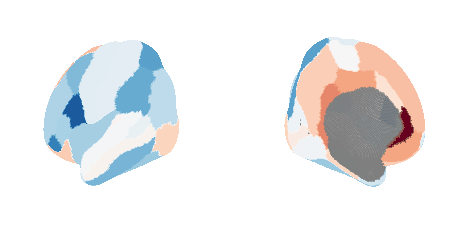

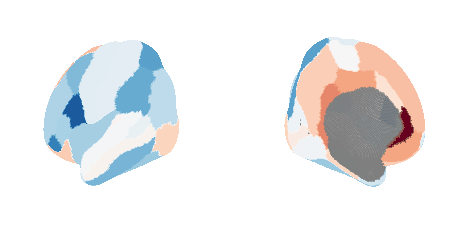

In [18]:
w, h = plt.figaspect(1 / 2)
fig, axs = plt.subplots(1,
                        2,
                        subplot_kw={'projection': '3d'},
                        figsize=(w, h))

plot_surf(surf_mesh=left_surface_mesh, 
                surf_map = left_aparc_corz_dense, 
                vmin=-.8, vmax=0.8, cmap="RdBu_r", 
                axes = axs[0],
                view = "lateral");

plot_surf(surf_mesh=left_surface_mesh, 
                surf_map = left_aparc_corz_dense, 
                vmin=-.8, vmax=0.8, cmap="RdBu_r", 
                axes = axs[1],
                view = "medial");

plot_surf_contours(surf_mesh=left_surface_mesh, 
                  roi_map = roi_map, figure = fig, axes = axs[1], view = "medial")

# What if we change the brain parcellation?

The brain parcellation used above is pretty coarse - the brain regions are pretty big. This parcellation is based on anatomical brain names (i.e. it's based on names of big brain regions divided by the brains largest folds). But what happens if we switch to another brain parcellation - with smaller regions of interest. 

We are now going to try repeating the whole process using parcellations that were developed by a pretty wondering fMRI imaging lab. ([Thomas Yeo's Computational Brain Imaging Group](https://sites.google.com/view/yeolab).

To read more about theses parcellations check out the paper:

Schaefer A, Kong R, Gordon EM, Laumann TO, Zuo XN, Holmes AJ, Eickhoff SB, Yeo BTT. [**Local-Global parcellation of the human cerebral cortex from intrinsic functional connectivity MRI**](http://people.csail.mit.edu/ythomas/publications/2018LocalGlobal-CerebCor.pdf). Cerebral Cortex, 29:3095-3114, 2018

The parcellation files are available in CIFTI format from their github repo:
https://github.com/ThomasYeoLab/CBIG

These parcellations are available at several resolutions - we will look at the 400 Parcel and the 1000 parcel version.

In [19]:
%%bash

## parcellating with Schaefer 400
wb_command -cifti-parcellate \
 data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_bold_32k_fsLR.dtseries.nii \
 data/atlases/Schaefer2018_400Parcels_17Networks_order.dlabel.nii \
 COLUMN \
 data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-schaefer400_bold.ptseries.nii

In [20]:
## load in the parcellated data
ptseries_schaefer400_file = 'data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-schaefer400_bold.ptseries.nii'
schaefer_ptseries_nib = nib.load(ptseries_schaefer400_file)
schaefer_ptseries_nib.get_fdata().shape

(818, 400)

(Note that the shape of the data is now 818 timepoints by 400 parcels)

In [21]:
## there's also lot's of new parcel names - let's only print the first 30
schaefer400_parcels = schaefer_ptseries_nib.header.get_axis(1).name
schaefer400_parcels[0:30]

array(['17Networks_LH_VisCent_ExStr_1', '17Networks_LH_VisCent_ExStr_2',
       '17Networks_LH_VisCent_ExStr_3', '17Networks_LH_VisCent_ExStr_4',
       '17Networks_LH_VisCent_ExStr_5', '17Networks_LH_VisCent_ExStr_6',
       '17Networks_LH_VisCent_Striate_1', '17Networks_LH_VisCent_ExStr_7',
       '17Networks_LH_VisCent_ExStr_8', '17Networks_LH_VisCent_ExStr_9',
       '17Networks_LH_VisCent_ExStr_10', '17Networks_LH_VisCent_ExStr_11',
       '17Networks_LH_VisPeri_ExStrInf_1',
       '17Networks_LH_VisPeri_ExStrInf_2',
       '17Networks_LH_VisPeri_ExStrInf_3',
       '17Networks_LH_VisPeri_ExStrInf_4',
       '17Networks_LH_VisPeri_ExStrInf_5',
       '17Networks_LH_VisPeri_StriCal_1',
       '17Networks_LH_VisPeri_StriCal_2',
       '17Networks_LH_VisPeri_ExStrSup_1',
       '17Networks_LH_VisPeri_ExStrSup_2',
       '17Networks_LH_VisPeri_ExStrSup_3',
       '17Networks_LH_VisPeri_ExStrSup_4',
       '17Networks_LH_VisPeri_ExStrSup_5', '17Networks_LH_SomMotA_1',
       '17Network

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in arctanh
  after removing the cwd from sys.path.


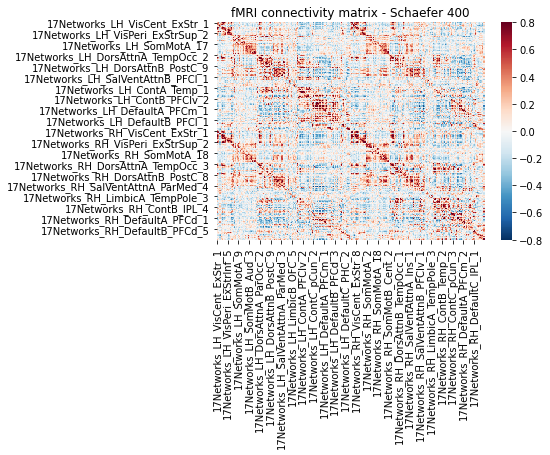

In [22]:
## creating the correlation matrix using pandas
ts_data = schaefer_ptseries_nib.get_fdata()
ts_df = pd.DataFrame(schaefer_ptseries_nib.get_fdata(), columns=schaefer400_parcels )
schaefer400_corZ_pd = np.arctanh(ts_df.corr())

## plotting this correlation matrix using seaborn
## note that seaborn skips a bunch of the parcelnames because they don't fit..
plt1 = sns.heatmap(schaefer400_corZ_pd, vmin=-.8, vmax=.8, cmap="RdBu_r").set_title("fMRI connectivity matrix - Schaefer 400")

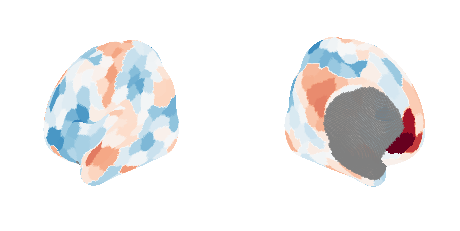

In [26]:
## let's grab another ROI 
roi_cor_nib = write_df_column_to_pscalar_nib(df = schaefer400_corZ_pd, 
                               pscalar_template = 'data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-schaefer400_bold.ptseries.nii',
                               columns =  ["17Networks_LH_DefaultA_PFCm_2"])

left_s400corz_dense = surf_map_from_pscalar_image(roi_cor_nib, 'CIFTI_STRUCTURE_CORTEX_LEFT')


w, h = plt.figaspect(1 / 2)
fig, axs = plt.subplots(1,
                        2,
                        subplot_kw={'projection': '3d'},
                        figsize=(w, h))

plot_surf(surf_mesh=left_surface_mesh, 
                surf_map = left_s400corz_dense, 
                vmin=-.8, vmax=0.8, cmap="RdBu_r", 
                axes = axs[0],
                view = "lateral");

plot_surf(surf_mesh=left_surface_mesh, 
                surf_map = left_s400corz_dense, 
                vmin=-.8, vmax=0.8, cmap="RdBu_r", 
                axes = axs[1],
                view = "medial");


### what about with 1000 parcels?

In [27]:
%%bash

## parcellating with Schaefer 400
wb_command -cifti-parcellate \
 data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_bold_32k_fsLR.dtseries.nii \
 data/atlases/Schaefer2018_1000Parcels_17Networks_order.dlabel.nii \
 COLUMN \
 data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-schaefer1000_bold.ptseries.nii

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  


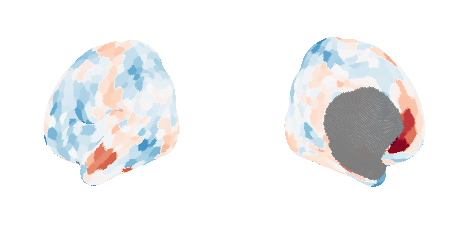

In [28]:
## load in the parcellated data
ptseries_schaefer1000_file = 'data/sub-MSC01/func/sub-MSC01_ses-func01_task-rest_atlas-schaefer1000_bold.ptseries.nii'
schaefer_ptseries_nib = nib.load(ptseries_schaefer1000_file)

## creating the correlation matrix using pandas
schaefer1000_parcels = schaefer_ptseries_nib.header.get_axis(1).name
ts_df = pd.DataFrame(schaefer_ptseries_nib.get_fdata(), columns=schaefer1000_parcels )
schaefer1000_corZ_pd = np.arctanh(ts_df.corr())

## let's grab another ROI 
roi_s1000_cor_nib = write_df_column_to_pscalar_nib(df = schaefer1000_corZ_pd, 
                               pscalar_template = ptseries_schaefer1000_file,
                               columns =  ["17Networks_LH_DefaultA_PFCm_2"])

left_s1000corz_dense = surf_map_from_pscalar_image(roi_s1000_cor_nib, 'CIFTI_STRUCTURE_CORTEX_LEFT')


w, h = plt.figaspect(1 / 2)
fig, axs = plt.subplots(1,
                        2,
                        subplot_kw={'projection': '3d'},
                        figsize=(w, h))

plot_surf(surf_mesh=left_surface_mesh, 
                surf_map = left_s1000corz_dense, 
                vmin=-.8, vmax=0.8, cmap="RdBu_r", 
                axes = axs[0],
                view = "lateral");

plot_surf(surf_mesh=left_surface_mesh, 
                surf_map = left_s1000corz_dense, 
                vmin=-.8, vmax=0.8, cmap="RdBu_r", 
                axes = axs[1],
                view = "medial");

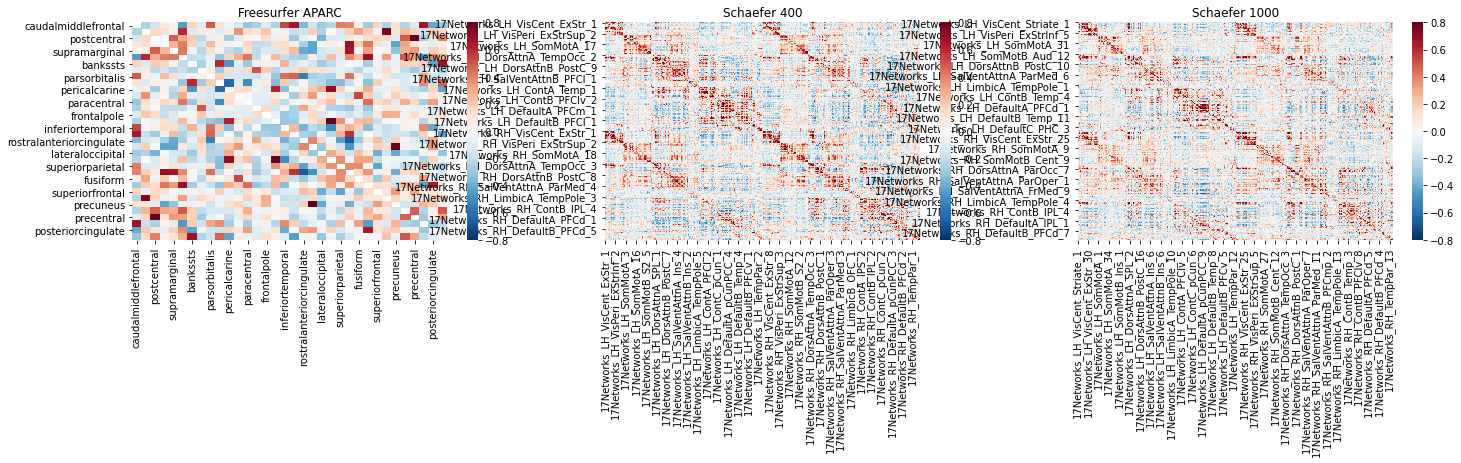

In [29]:
## let plot all three scatter plots together
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(24)
sns.heatmap(aparc_corZ_df, vmin=-.8, vmax=.8, cmap="RdBu_r", ax = axs[0]).set_title("Freesurfer APARC");
sns.heatmap(schaefer400_corZ_pd, vmin=-.8, vmax=.8, cmap="RdBu_r", ax = axs[1]).set_title("Schaefer 400");
sns.heatmap(schaefer1000_corZ_pd, vmin=-.8, vmax=.8, cmap="RdBu_r", ax = axs[2]).set_title("Schaefer 1000");

Let's look at all three connectivity matrixes side by side

## Doing more with nilearn

For this demo I've mostly been calculating correlation matrixes using pandas .corr, but nilearn has more functionality to do this faster, to have access to other connectivity measures (like partial correlation and tangent) - and to iterate over many input files in a nice way.

Check out an example of connectivity measures [in this tutorial](https://nilearn.github.io/auto_examples/03_connectivity/plot_group_level_connectivity.html#sphx-glr-auto-examples-03-connectivity-plot-group-level-connectivity-py)

Here's an example of using nilearn connetivity measure on our data.

Text(0.5, 1.0, 'Schaefer 1000 - nilearn')

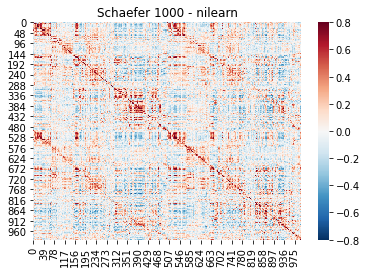

In [30]:
from nilearn.connectome import ConnectivityMeasure
ts_data = schaefer_ptseries_nib.get_fdata()

## setting the type of ConnectivityMeasure as correlation
correlation_measure = ConnectivityMeasure(kind='correlation')

## apply this method to and data from our file
nilearn_correlation_matrix = correlation_measure.fit_transform(
        [np.array(ts_data)])

sns.heatmap(nilearn_correlation_matrix[0], vmin=-.8, vmax=.8, cmap="RdBu_r").set_title("Schaefer 1000 - nilearn")